# The scikit-learn preprocessing module for feature scaling

<br>

<br>

### Min-Max scaling

Using the following equation for Min-Max scaling: \begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

will scale our data to a range between 0 and 1.




In [1]:
import numpy as np

np.random.seed(123)

# A random 2D-array ranging from 0-100

X = np.random.rand(100,2)
X.dtype = np.float64
X *= 100

<br>

#### Min-Max scaling - Bottom-up via NumPy

In [2]:
def numpy_minmax(X):
    xmin =  X.min(axis=0)
    return (X - xmin) / (X.max(axis=0) - xmin)

<br>

#### Min-Max scaling - scikit-learn preprocessing

In [3]:
from sklearn import preprocessing

def sci_minmax(X):
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
    return minmax_scale.fit_transform(X)

<br>

#### Min-Max scaling - Visualization

In [4]:
%matplotlib inline

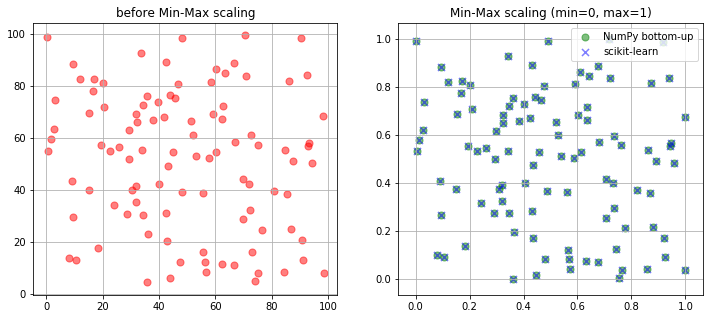

In [5]:
from matplotlib import pyplot as plt

sci_mm = sci_minmax(X)
numpy_mm = numpy_minmax(X)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))

ax1.scatter(X[:,0], X[:,1],
        color='r',
        alpha=0.5,
        marker='o',
        s=50
        )

ax2.scatter(numpy_mm[:,0], numpy_mm[:,1],
        color='g',
        label='NumPy bottom-up',
        alpha=0.5,
        marker='o',
        s=50
        )

ax2.scatter(sci_mm[:,0], sci_mm[:,1],
        color='b',
        label='scikit-learn',
        alpha=0.5,
        marker='x',
        s=50
        )

ax1.set_title('before Min-Max scaling')
ax2.set_title('Min-Max scaling (min=0, max=1)')
ax1.grid()
ax2.grid()
ax2.legend()

plt.show()

<br>
<br>
<br>

### Z-score Standardization

The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with   

$\mu = 0$ and $\sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

<br>

#### Z-score scaling - Bottom-up via NumPy

In [6]:
def numpy_zscore(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

<br>

#### Z-score scaling - via scikit-learn

In [7]:
def sci_zscore(X):
    std_scale = preprocessing.StandardScaler(copy=True)
    return std_scale.fit_transform(X)

<br>

#### Z-score scaling - visualization

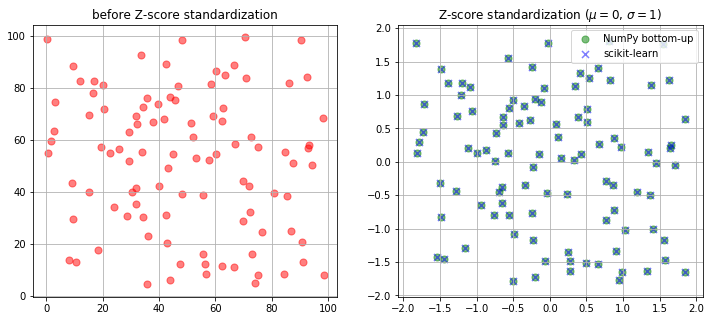

In [8]:
from matplotlib import pyplot as plt

sci_z = sci_zscore(X)
numpy_z = numpy_zscore(X)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))

ax1.scatter(X[:,0], X[:,1],
        color='r',
        alpha=0.5,
        marker='o',
        s=50
        )

ax2.scatter(numpy_z[:,0], numpy_z[:,1],
        color='g',
        label='NumPy bottom-up',
        alpha=0.5,
        marker='o',
        s=50
        )

ax2.scatter(sci_z[:,0], sci_z[:,1],
        color='b',
        label='scikit-learn',
        alpha=0.5,
        marker='x',
        s=50
        )


ax1.set_title('before Z-score standardization')
ax2.set_title('Z-score standardization ($\mu=0$, $\sigma=1$)')
ax1.grid()
ax2.grid()
ax2.legend()

plt.show()

<br>
<br>

<br>

# Bechmarking via `timeit`

In [9]:
import timeit

funcs = (numpy_minmax, sci_minmax, sci_zscore, numpy_zscore)

timings = {f.__name__:[] for f in funcs}

orders = [10**i for i in range(1, 5)]

for n in orders:

    print('n=%s (%s of %s)' %(n, orders.index(n)+1, len(orders)))
    X = np.random.rand(n,n)
    X.dtype = np.float64
    X *= 100 
    
    for f in timings.keys():

        timings[f].append(min(timeit.Timer('%s(X)' %f, 
            'from __main__ import %s, X' %f).repeat(repeat=5, number=1)))

print('finished')

n=10 (1 of 4)
n=100 (2 of 4)
n=1000 (3 of 4)
n=10000 (4 of 4)
finished


In [10]:
%matplotlib inline

In [11]:
size = np.asarray(orders)**2

In [12]:
from matplotlib import pyplot as plt


    
def plot():
    
    def settings():
        plt.xlim([min(size) / 10, max(size)* 10])
        plt.grid()
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.xscale('log')
        plt.yscale('log')
        plt.legend(loc='upper left', fontsize=14)
        plt.xlabel('number of matrix elements (log-scale)', fontsize=16)
        plt.ylabel('time in seconds (log-scale)', fontsize=16)
    
    fig = plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    plt.plot(size, timings['numpy_minmax'], label='NumPy')
    plt.plot(size, timings['sci_minmax'], label='scikit-learn')
    plt.title('Min-Max scaling (min=0, max=1)', fontsize=22)
    settings()
    
    plt.subplot(1,2,2)
    plt.plot(size, timings['numpy_zscore'], label='NumPy')
    plt.plot(size, timings['sci_zscore'], label='scikit-learn')
    plt.title('Z-score scaling ($\mu=0$, $\sigma=1$)', fontsize=22)
    settings()
    
    plt.tight_layout()
    plt.show()

<br>
<br>

# Results

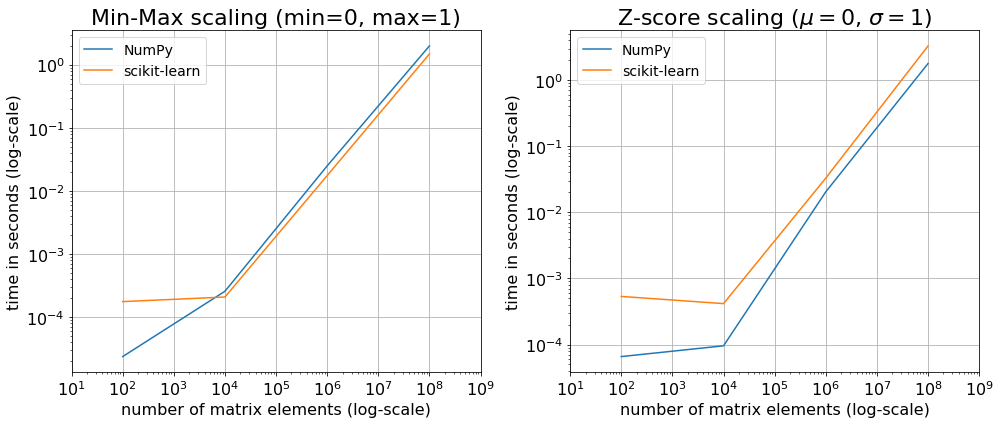

In [16]:
plot()

The plot indicates that there is no real difference between the "manual" approach via NumPy or using the `preprocessing` module from scikit. That's good news and also what we would expect!